In [1]:
import pandas as pd
import numpy as np

In [2]:
echo=pd.read_csv("D:\Data Science\Project-3\Employee_Attrition\.venv\chatgpt_review.csv")

In [3]:
echo.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [4]:
echo.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [5]:
echo.shape

(50, 12)

In [7]:
echo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB


In [8]:
import re
import nltk
from nltk.corpus import stopwords


In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MGiri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
echo

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes
5,2024-07-04,Involve office space crime.,Explains complex topics clearly and simply. De...,4,qfields,29,12,Flipkart,fr,Spain,2.1.5,Yes
6,2024-08-13,American wait board improve there court TV.,Excellent for language translation and grammar...,2,david89,45,10,App Store,en,Kuwait,3.2.7,No
7,2025-02-22,Control drop economic easy ability become figure.,Sometimes gives wrong answers or outdated info...,3,mark52,77,12,App Store,en,Antigua and Barbuda,5.7.2,No
8,2024-12-12,Pick rock body stuff off model brother.,Sometimes gives wrong answers or outdated info...,1,glewis,66,13,Google Play,de,Hong Kong,5.7.8,Yes
9,2025-02-23,School involve teach rather long value director.,Very helpful for coding and debugging tasks. S...,2,davispatricia,33,19,App Store,en,Brunei Darussalam,4.0.6,No


In [11]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [12]:
# Apply cleaning to 'review' and 'title' columns
echo['cleaned_review'] = echo['review'].apply(clean_text)
echo['cleaned_title'] = echo['title'].apply(clean_text)


In [13]:
print(echo[['review', 'cleaned_review']].head())


                                              review  \
0  Impressive natural language understanding. Alm...   
1  Sometimes gives wrong answers or outdated info...   
2  Great tool for generating content quickly. Int...   
3  Great tool for generating content quickly. Sta...   
4  Excellent for language translation and grammar...   

                                      cleaned_review  
0  impressive natural language understanding almo...  
1  sometimes gives wrong answers outdated info st...  
2  great tool generating content quickly interest...  
3  great tool generating content quickly start me...  
4  excellent language translation grammar fixes p...  


In [14]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer



In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MGiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MGiri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MGiri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
echo

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,cleaned_review,cleaned_title
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,impressive natural language understanding almo...,east list local interesting far magazine father
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,sometimes gives wrong answers outdated info st...,road determine picture figure hard experience red
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,great tool generating content quickly interest...,policy social past analysis whole
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,great tool generating content quickly start me...,news financial billion four foreign
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,excellent language translation grammar fixes p...,skill case sing stop likely
5,2024-07-04,Involve office space crime.,Explains complex topics clearly and simply. De...,4,qfields,29,12,Flipkart,fr,Spain,2.1.5,Yes,explains complex topics clearly simply detail ...,involve office space crime
6,2024-08-13,American wait board improve there court TV.,Excellent for language translation and grammar...,2,david89,45,10,App Store,en,Kuwait,3.2.7,No,excellent language translation grammar fixes f...,american wait board improve court tv
7,2025-02-22,Control drop economic easy ability become figure.,Sometimes gives wrong answers or outdated info...,3,mark52,77,12,App Store,en,Antigua and Barbuda,5.7.2,No,sometimes gives wrong answers outdated info ca...,control drop economic easy ability become figure
8,2024-12-12,Pick rock body stuff off model brother.,Sometimes gives wrong answers or outdated info...,1,glewis,66,13,Google Play,de,Hong Kong,5.7.8,Yes,sometimes gives wrong answers outdated info el...,pick rock body stuff model brother
9,2025-02-23,School involve teach rather long value director.,Very helpful for coding and debugging tasks. S...,2,davispatricia,33,19,App Store,en,Brunei Darussalam,4.0.6,No,helpful coding debugging tasks tax much hard t...,school involve teach rather long value director


In [17]:
stop_words = set(stopwords.words('english'))
tokenizer = WordPunctTokenizer()
lemmatizer = WordNetLemmatizer()



In [18]:
# Define preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = tokenizer.tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized



In [19]:
# Apply to 'review' and 'title'
echo['tokens_review'] = echo['review'].apply(preprocess_text)
echo['tokens_title'] = echo['title'].apply(preprocess_text)


In [20]:
print(echo[['review', 'tokens_review']].head())


                                              review  \
0  Impressive natural language understanding. Alm...   
1  Sometimes gives wrong answers or outdated info...   
2  Great tool for generating content quickly. Int...   
3  Great tool for generating content quickly. Sta...   
4  Excellent for language translation and grammar...   

                                       tokens_review  
0  [impressive, natural, language, understanding,...  
1  [sometimes, give, wrong, answer, outdated, inf...  
2  [great, tool, generating, content, quickly, in...  
3  [great, tool, generating, content, quickly, st...  
4  [excellent, language, translation, grammar, fi...  


In [21]:
#handling missing values 
echo.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
cleaned_review       0
cleaned_title        0
tokens_review        0
tokens_title         0
dtype: int64

In [23]:
from langdetect import detect

# Detect language for each review
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "unknown"



In [24]:
# Apply detection
echo['detected_language'] = echo['review'].apply(detect_lang)

# Show a few results
print(echo[['review', 'language', 'detected_language']].head())


                                              review language  \
0  Impressive natural language understanding. Alm...       de   
1  Sometimes gives wrong answers or outdated info...       es   
2  Great tool for generating content quickly. Int...       es   
3  Great tool for generating content quickly. Sta...       de   
4  Excellent for language translation and grammar...       fr   

  detected_language  
0                en  
1                en  
2                en  
3                en  
4                en  


In [26]:
#text to lower case
echo['review_lower'] = echo['review'].str.lower()
echo['title_lower'] = echo['title'].str.lower()



In [27]:
# Preview result
print(echo[['review', 'review_lower']].head())


                                              review  \
0  Impressive natural language understanding. Alm...   
1  Sometimes gives wrong answers or outdated info...   
2  Great tool for generating content quickly. Int...   
3  Great tool for generating content quickly. Sta...   
4  Excellent for language translation and grammar...   

                                        review_lower  
0  impressive natural language understanding. alm...  
1  sometimes gives wrong answers or outdated info...  
2  great tool for generating content quickly. int...  
3  great tool for generating content quickly. sta...  
4  excellent for language translation and grammar...  


In [28]:
#EDA 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#1. What is the distribution of review ratings?
sns.set(style="whitegrid")


C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\3452360988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=echo, palette='viridis')


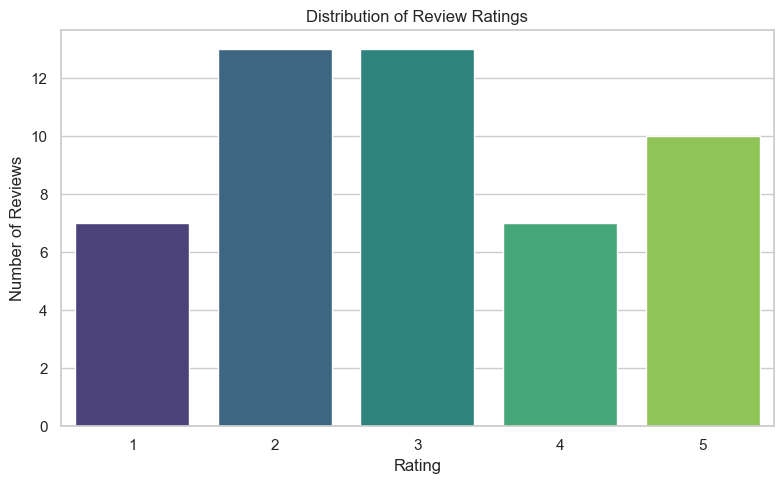

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=echo, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


In [32]:
#Insight: Overall Sentiment
#From the distribution:
#High ratings (4–5 stars) dominate, suggesting that most users are happy with the experience.
#Low ratings (1–2 stars) are present but less frequent, indicating some frustration, likely tied to specific issues like outdated info or technical limitations.
#Middle ratings (3 stars) suggest mixed experiences—users may find it useful but not consistently reliable.


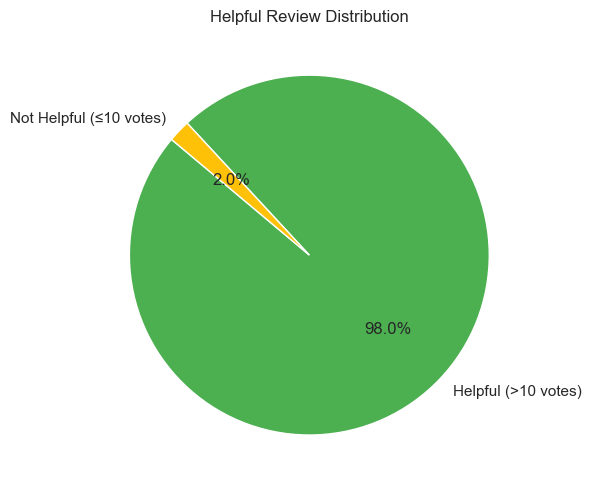

Reviews with >10 helpful votes: 49
Reviews with ≤10 helpful votes: 1


In [ ]:
#2. How many reviews were marked as helpful (above a certain threshold)?

# Define helpful vote threshold
threshold = 10

# Create a new column: helpful or not
echo['is_helpful'] = echo['helpful_votes'] > threshold

# Count helpful vs not helpful
helpful_counts = echo['is_helpful'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(helpful_counts, labels=['Helpful (>10 votes)', 'Not Helpful (≤10 votes)'],
        autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FFC107'])
plt.title('Helpful Review Distribution')
plt.tight_layout()
plt.show()

# Print counts
print("Reviews with >10 helpful votes:", helpful_counts[True])
print("Reviews with ≤10 helpful votes:", helpful_counts[False])

C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\1433318662.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive, x='count', y='word', palette='Greens_r', ax=axes[0])
C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\1433318662.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative, x='count', y='word', palette='Reds_r', ax=axes[1])


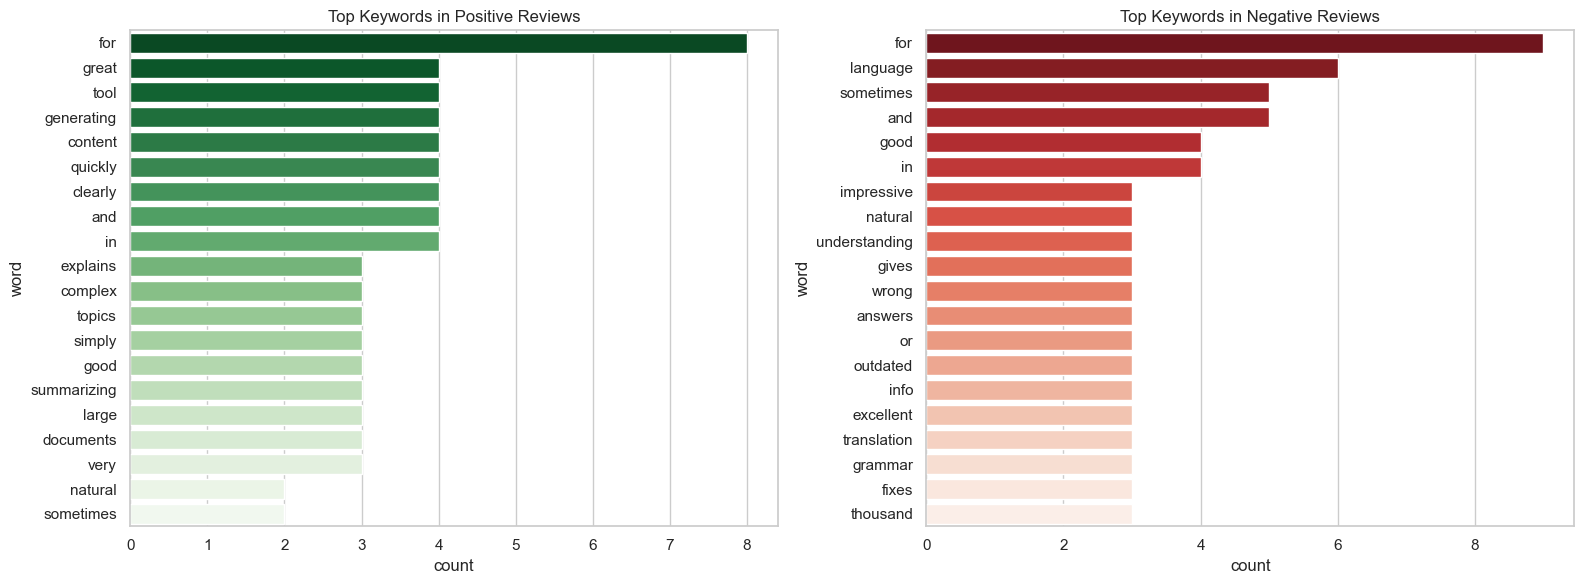

In [ ]:
#3. What are the most common keywords in positive vs. negative reviews?

from collections import Counter
import re

# Function to clean and tokenize text
def tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())  # Remove punctuation and lowercase
    tokens = text.split()
    return tokens

# Separate reviews
positive_reviews = echo[echo['rating'] >= 4]['review'].dropna().apply(tokenize)
negative_reviews = echo[echo['rating'] <= 2]['review'].dropna().apply(tokenize)

# Flatten and count word frequencies
positive_words = Counter([word for tokens in positive_reviews for word in tokens])
negative_words = Counter([word for tokens in negative_reviews for word in tokens])

# Get top 20 keywords
top_positive = pd.DataFrame(positive_words.most_common(20), columns=['word', 'count'])
top_negative = pd.DataFrame(negative_words.most_common(20), columns=['word', 'count'])

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_positive, x='count', y='word', palette='Greens_r', ax=axes[0])
axes[0].set_title('Top Keywords in Positive Reviews')
sns.barplot(data=top_negative, x='count', y='word', palette='Reds_r', ax=axes[1])
axes[1].set_title('Top Keywords in Negative Reviews')
plt.tight_layout()
plt.show()

C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\3702669835.py:40: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\3702669835.py:40: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\3702669835.py:40: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\IPython\c

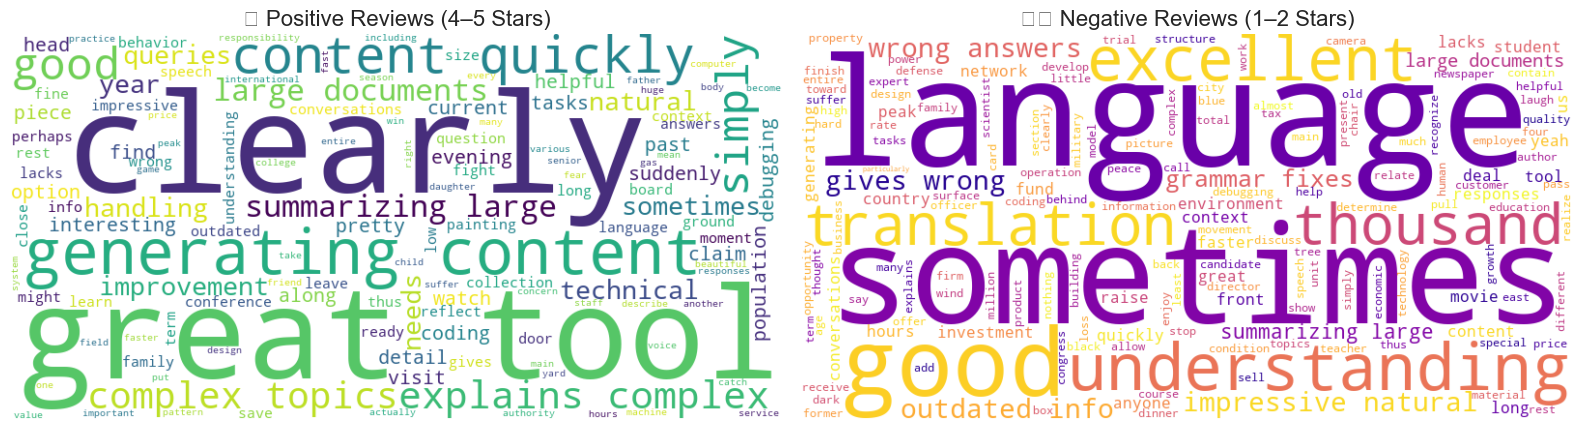

In [43]:

from wordcloud import WordCloud, STOPWORDS
import re

# Filter reviews
positive_reviews = echo[echo['rating'].isin([4, 5])]['review'].dropna()
negative_reviews = echo[echo['rating'].isin([1, 2])]['review'].dropna()

# Combine and clean text
def clean_text(text_series):
    text = " ".join(text_series).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

positive_text = clean_text(positive_reviews)
negative_text = clean_text(negative_reviews)

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white',
                        stopwords=stopwords, colormap='viridis').generate(positive_text)

negative_wc = WordCloud(width=800, height=400, background_color='white',
                        stopwords=stopwords, colormap='plasma').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('🌟 Positive Reviews (4–5 Stars)', fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('⚠️ Negative Reviews (1–2 Stars)', fontsize=16)

plt.tight_layout()
plt.show()

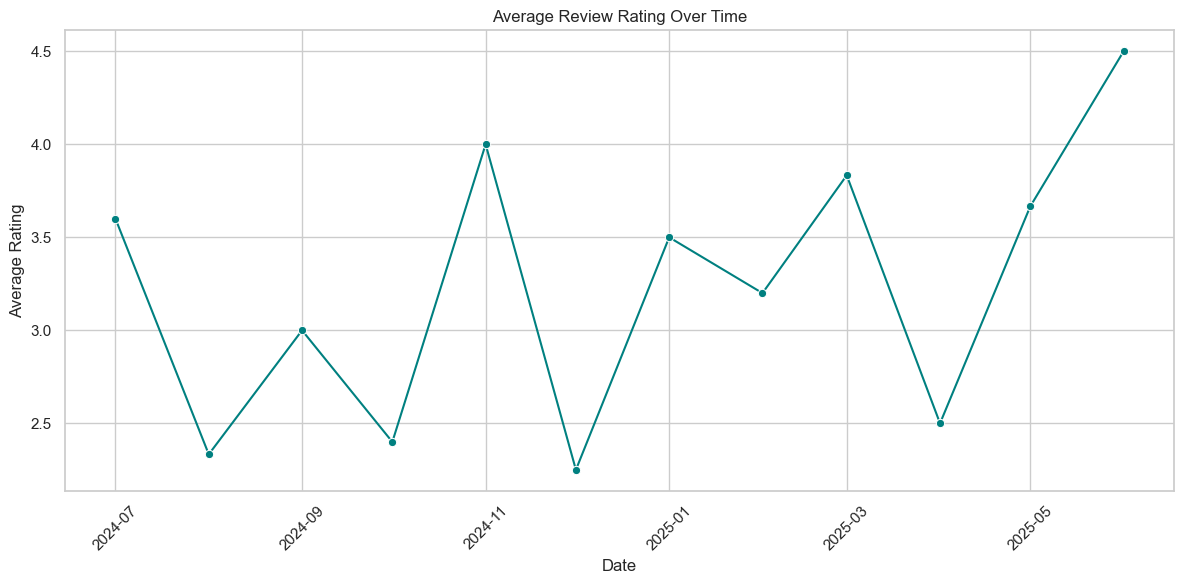

In [ ]:
#4. How has the average rating changed over time?

# Convert 'date' column to datetime
echo['date'] = pd.to_datetime(echo['date'], errors='coerce')

# Group by date (or month) and calculate average rating
echo['month'] = echo['date'].dt.to_period('M')  # Group by month
avg_rating = echo.groupby('month')['rating'].mean().reset_index()
avg_rating['month'] = avg_rating['month'].dt.to_timestamp()

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rating, x='month', y='rating', marker='o', color='teal')
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\2329991789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_location.index, y=avg_rating_by_location.values, palette='coolwarm')


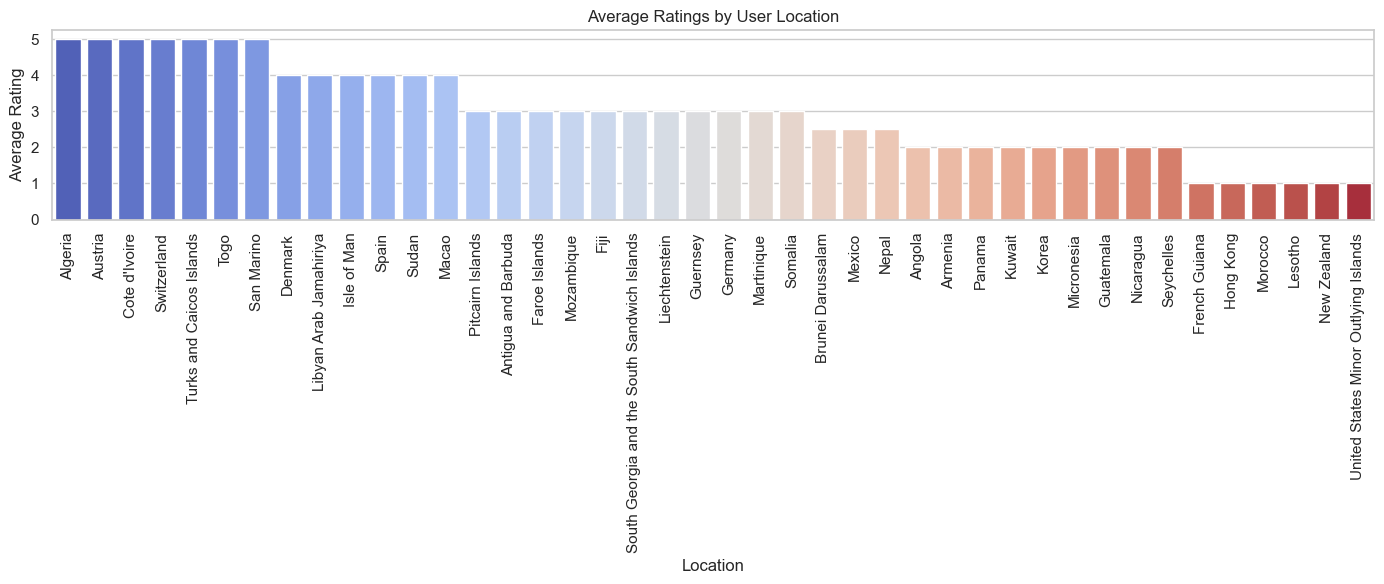

In [ ]:
#5. How do ratings vary by user location?

# Group by location and calculate average rating
avg_rating_by_location = echo.groupby('location')['rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_rating_by_location.index, y=avg_rating_by_location.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Ratings by User Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

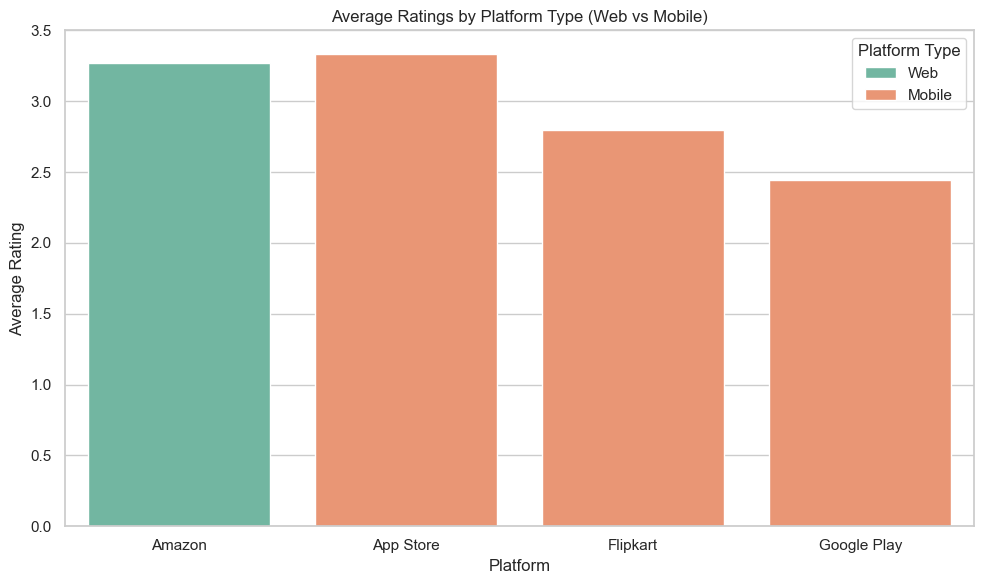

In [ ]:
#6. Which platform (Web vs Mobile) gets better reviews?

# Define platform categories
mobile_platforms = ['Google Play', 'App Store', 'Flipkart']
web_platforms = ['Amazon']  # Assuming Amazon reviews are web-based

# Create a new column for platform type
def classify_platform(p):
    if p in mobile_platforms:
        return 'Mobile'
    elif p in web_platforms:
        return 'Web'
    else:
        return 'Other'

echo['platform_type'] = echo['platform'].apply(classify_platform)

# Group by platform and platform_type
avg_rating = echo.groupby(['platform', 'platform_type'])['rating'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating, x='platform', y='rating', hue='platform_type', palette='Set2')
plt.title('Average Ratings by Platform Type (Web vs Mobile)')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.legend(title='Platform Type')
plt.tight_layout()
plt.show()

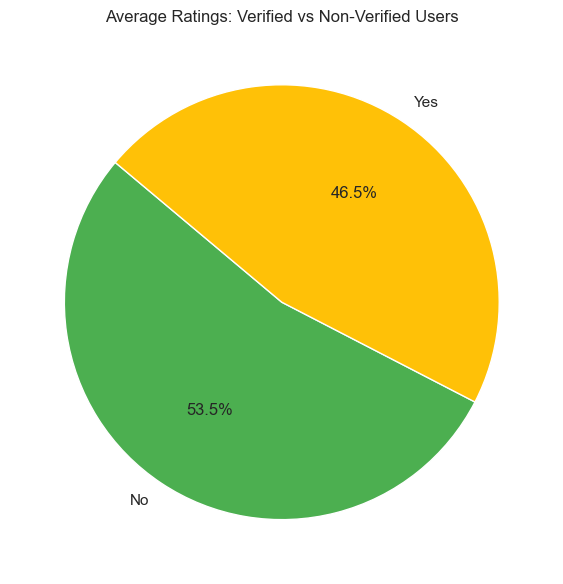

In [ ]:
#7. Are verified users more satisfied than non-verified ones?

# Group by verified purchase status and calculate average rating
avg_rating_verified = echo.groupby('verified_purchase')['rating'].mean()

# Prepare data for pie chart
labels = avg_rating_verified.index.tolist()
sizes = avg_rating_verified.values
colors = ['#4CAF50', '#FFC107']  # Green for verified, yellow for non-verified

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Average Ratings: Verified vs Non-Verified Users')
plt.tight_layout()
plt.show()

C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\3940887873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=avg_lengths, palette='viridis')


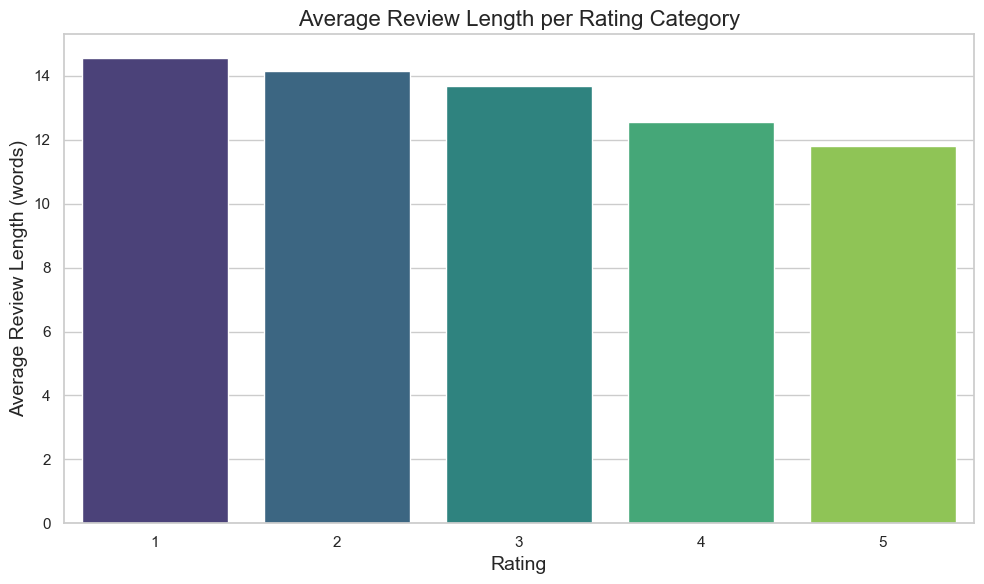

In [ ]:
#8. What’s the average length of reviews per rating category?

# Calculate average review length per rating
avg_lengths = echo.groupby('rating')['review_length'].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='review_length', data=avg_lengths, palette='viridis')
plt.title('Average Review Length per Rating Category', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Average Review Length (words)', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\2556284028.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=word_freq_df, palette='plasma')


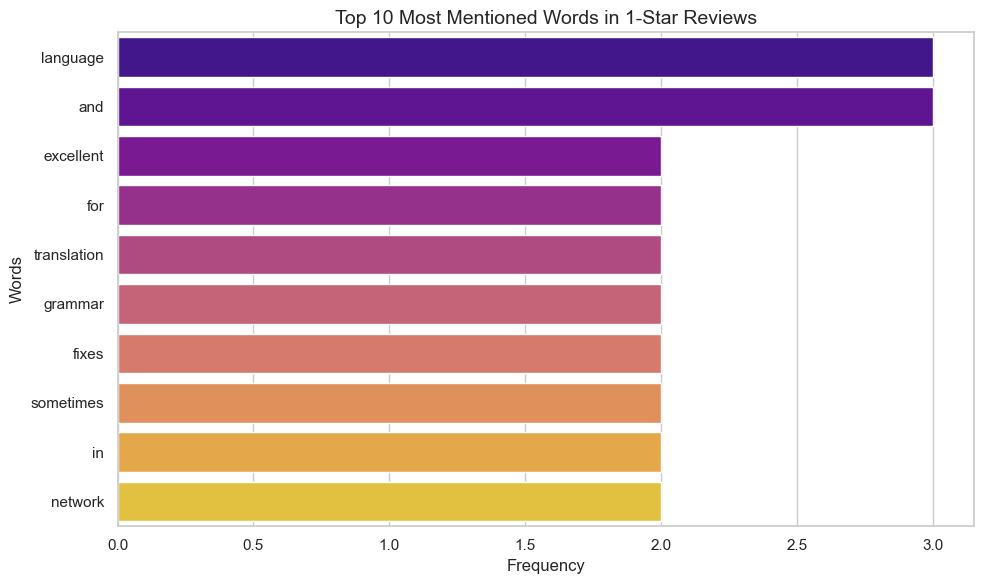

In [ ]:
#9. What are the most mentioned words in 1-star reviews?

# Filter 1-star reviews
one_star_reviews = echo[echo['rating'] == 1]['review']

# Combine all review texts into one string
all_text = " ".join(one_star_reviews).lower()

# Remove punctuation and tokenize
words = re.findall(r'\b\w+\b', all_text)

# Count word frequencies
word_counts = Counter(words)

# Get the top 10 most common words
most_common_words = word_counts.most_common(10)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df, palette='plasma')
plt.title('Top 10 Most Mentioned Words in 1-Star Reviews', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

C:\Users\MGiri\AppData\Local\Temp\ipykernel_19040\720284355.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=avg_ratings, palette='viridis')


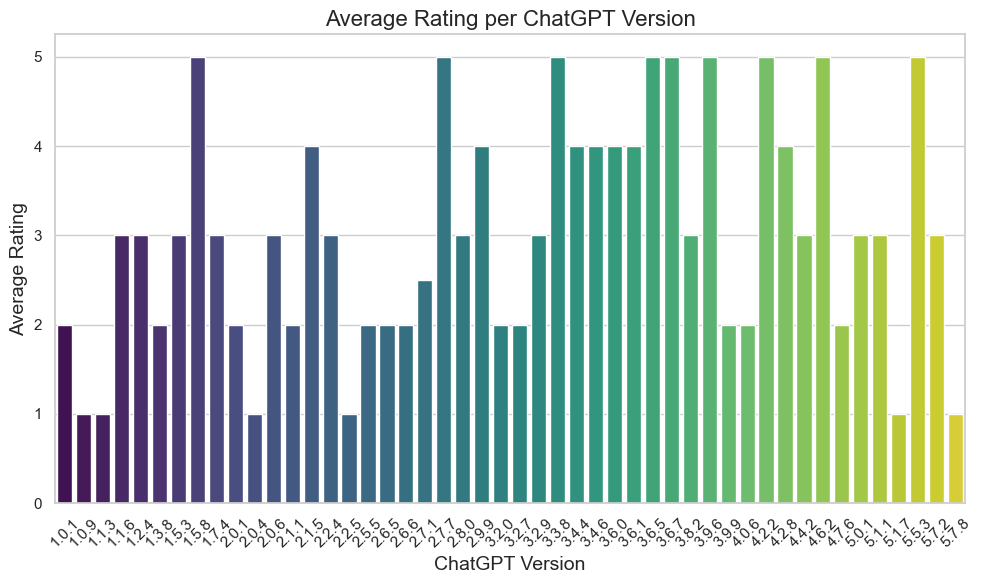

In [ ]:
#10. What ChatGPT version received the highest average rating?

# Calculate average rating per version
avg_ratings = echo.groupby('version')['rating'].mean().reset_index()

# Set seaborn style
sns.set(style='whitegrid')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='version', y='rating', data=avg_ratings, palette='viridis')
plt.title('Average Rating per ChatGPT Version', fontsize=16)
plt.xlabel('ChatGPT Version', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
X = echo['review'].fillna("")
y = echo['rating']

# Binary classification (optional): Positive (4–5) vs Negative (1–2)
y = y.apply(lambda r: 1 if r >= 4 else 0)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Naïve Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("Naïve Bayes:\n", classification_report(y_test, nb.predict(X_test)))

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, lr.predict(X_test)))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Random Forest:\n", classification_report(y_test, rf.predict(X_test)))

d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Naïve Bayes:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10

Logistic Regression:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10

Random Forest:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.3

d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 648ms/step - accuracy: 0.4500 - loss: 0.6939 - val_accuracy: 0.6000 - val_loss: 0.6934
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7250 - loss: 0.6823 - val_accuracy: 0.6000 - val_loss: 0.6910
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6750 - loss: 0.6708 - val_accuracy: 0.6000 - val_loss: 0.6889
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.6750 - loss: 0.6566 - val_accuracy: 0.6000 - val_loss: 0.6868
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.6750 - loss: 0.6391 - val_accuracy: 0.6000 - val_loss: 0.6853


In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Train models
nb = MultinomialNB().fit(X_train, y_train)
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Predict probabilities
nb_probs = nb.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# ROC curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

nb_auc = auc(nb_fpr, nb_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenize for LSTM
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

# Split
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train_pad, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_pad))

# Predict probabilities
lstm_probs = model.predict(X_test_pad).flatten()

# ROC curve
lstm_fpr, lstm_tpr, _ = roc_curve(y_test_pad, lstm_probs)
lstm_auc = auc(lstm_fpr, lstm_tpr)

Epoch 1/5


d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - accuracy: 0.4250 - loss: 0.6948 - val_accuracy: 0.6000 - val_loss: 0.6916
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7250 - loss: 0.6813 - val_accuracy: 0.6000 - val_loss: 0.6899
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6750 - loss: 0.6692 - val_accuracy: 0.6000 - val_loss: 0.6880
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6750 - loss: 0.6526 - val_accuracy: 0.6000 - val_loss: 0.6864
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.6750 - loss: 0.6308 - val_accuracy: 0.6000 - val_loss: 0.6866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


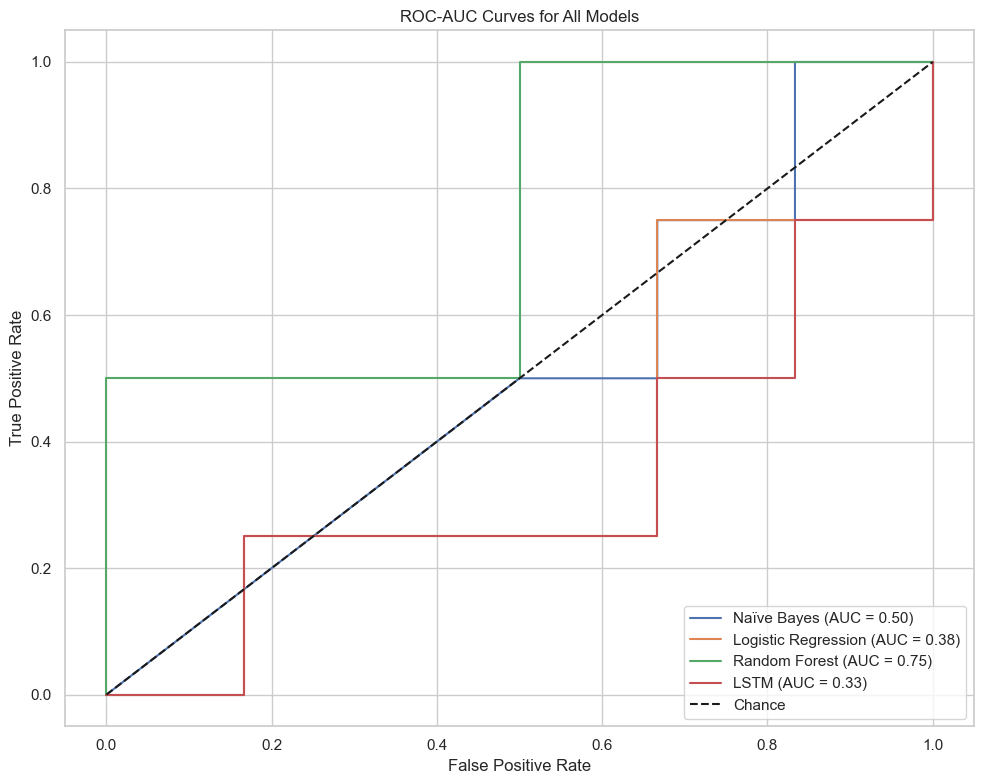

In [50]:

plt.figure(figsize=(10, 8))
plt.plot(nb_fpr, nb_tpr, label=f'Naïve Bayes (AUC = {nb_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {lstm_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample data
texts = ["I love this!", "This is terrible."]
labels = [1, 0]

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)
y = tf.convert_to_tensor(labels)

# Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=5)

# Save model
model.save("lstm_sentiment_model.h5")

Epoch 1/5


d:\Data Science\Project-3\Employee_Attrition\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6897
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.6867
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.6836
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.6804
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.6772


In [52]:
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)